In [244]:
import srsly
import spacy
import scispacy
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() 

In [245]:
def pre_processing(text):
    text = text.replace('–','')
    text = text.replace('…',' ')
    text = text.replace('[','')
    text = text.replace(']','')
    text = text.replace('’s','')
    return text

In [246]:
def process_text(text):
    doc = nlp(text.lower())
    result = []
    for token in doc:
        #if token.text in nlp.Defaults.stop_words:
            #continue
        #if token.is_punct:
            #continue
        if token.lemma_ == '-PRON-':
            continue
        result.append(token.lemma_)
    return " ".join(result)

In [247]:
transcription = srsly.read_json('medical_transcription.json')
transcription_cleaned = process_text(transcription['text'])
transcription_cleaned = pre_processing(transcription_cleaned)

In [248]:
nlp_ner = spacy.load("en_ner_bc5cdr_md")
nlp = spacy.load("scispacy_models/en_core_sci_lg")

In [14]:
doc = nlp(transcription_cleaned)
doc_ner = nlp_ner(transcription_cleaned)

In [249]:
entities = [ent for ent in doc_ner.ents]

In [250]:
raw_G = nx.Graph()
for ent1 in entities:
    for ent2 in doc:
            similarity = ent1.similarity(ent2) 
            if similarity >= 0.2 and similarity != 1.0:
                raw_G.add_edge(str(ent1), str(ent2), weight = similarity)

c:\users\bruno\documents\1sti\kg\prodigy\prodigy\lib\site-packages\ipykernel_launcher.py:4: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  after removing the cwd from sys.path.


In [251]:
raw_G.number_of_nodes()

27

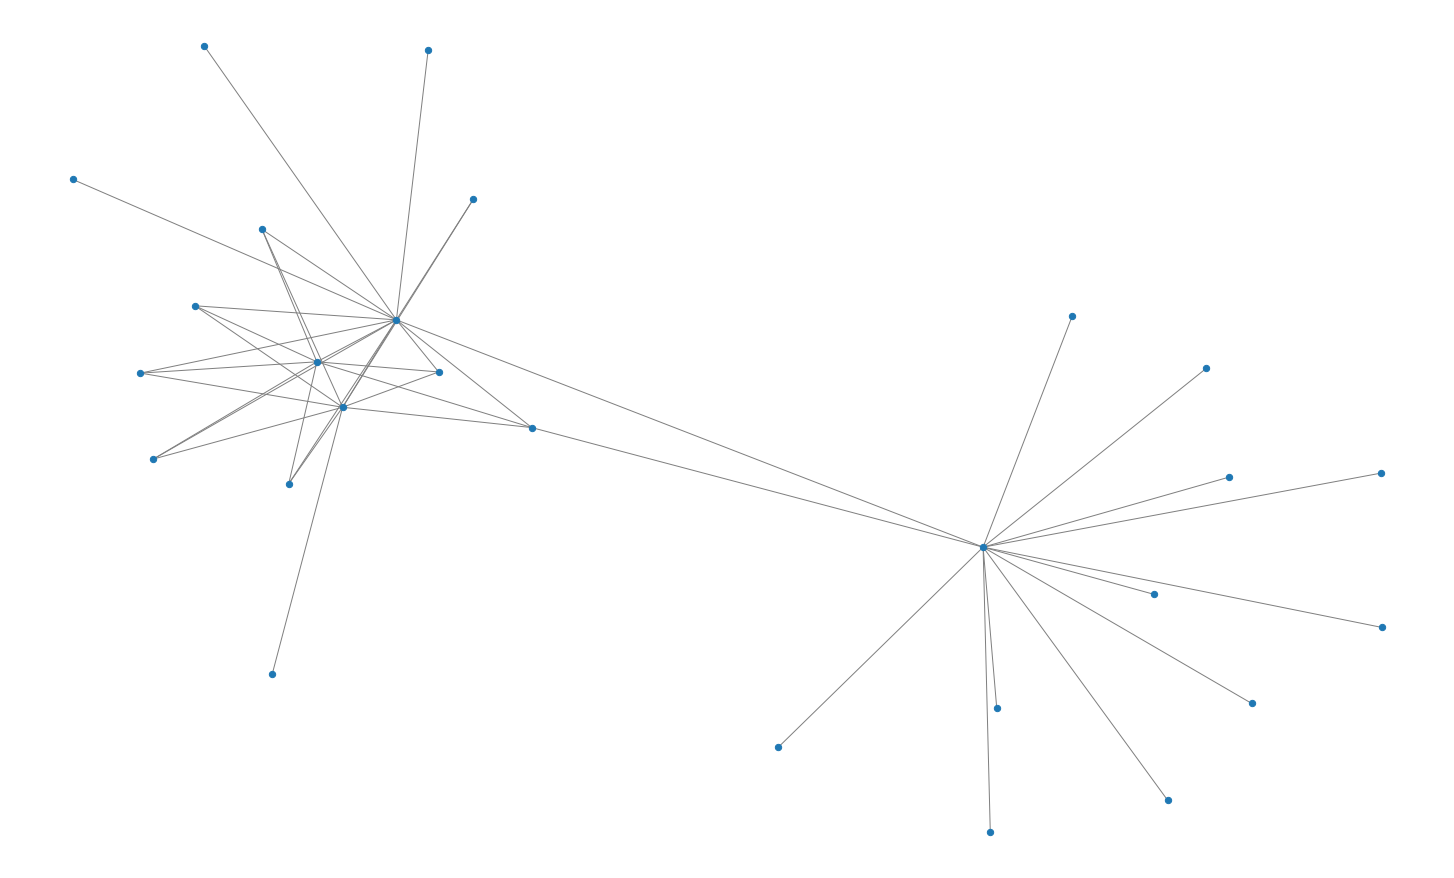

In [252]:
nx.draw(raw_G, node_size=40, edge_color='gray')

In [253]:
plt.rcParams['figure.figsize'] = (20,12)

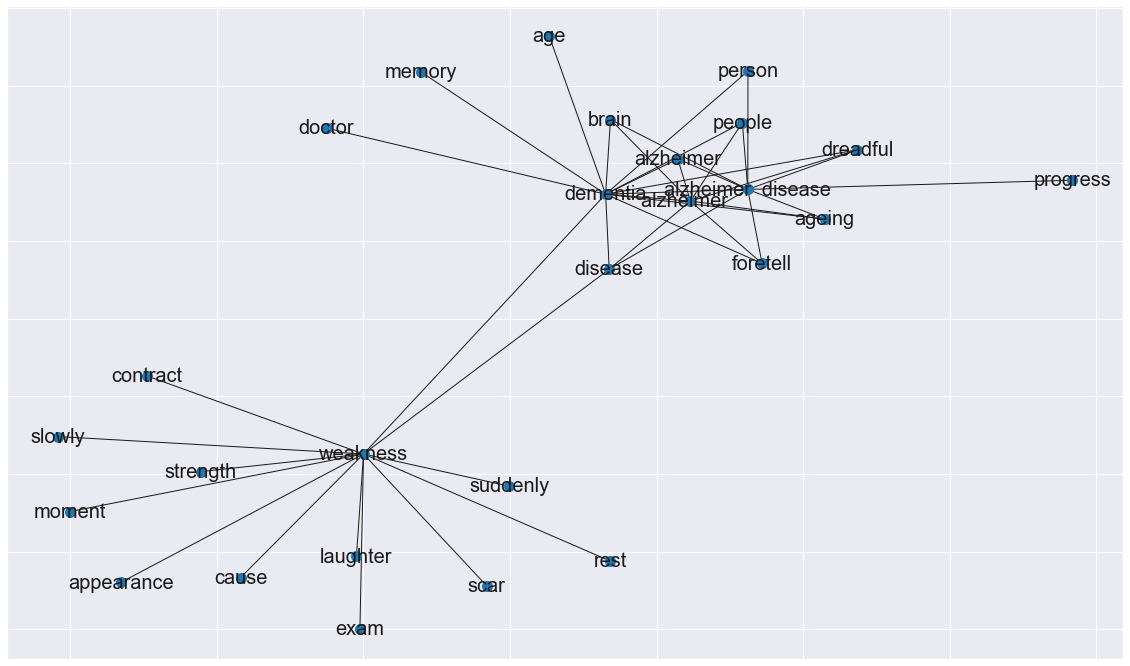

In [257]:
nx.draw_networkx(raw_G, node_size = 100, font_size = 20)
plt.show()

In [258]:
net = Network(height="750px", width="100%", bgcolor="#E5ECF6", font_color="#444444", directed=True)
for ent1 in entities:
    for ent2 in doc:
            similarity = ent1.similarity(ent2) 
            if similarity >= 0.2 and similarity != 1.0:
                net.add_node(str(ent1), size=14, color = '#2169AD')
                net.add_node(str(ent2), size=10, color = '#78CABC')
                net.add_edge(str(ent1), str(ent2), weight = round(similarity * 100))
                

c:\users\bruno\documents\1sti\kg\prodigy\prodigy\lib\site-packages\ipykernel_launcher.py:4: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  after removing the cwd from sys.path.


In [259]:
net.show_buttons(filter_=['physics'])
net.show('example.html')